In [1]:
import numpy as np
import sacc
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib notebook

In [2]:
# set this to your local analysis ID
ANALYSIS_ID = '80a856527c844f97ab8cb50e0417d1cf'

The DES data vector is `[src-src, lens-src, lens-lens]` where
all unique combinations are kept except that only the diagonal `lens-lens` combinations are kept.

In [3]:
n_src = 4
n_lens = 5

Now lets read the data

In [4]:
des_data = sacc.Sacc.load_fits('des_y1_3x2pt_sacc_data.fits')
fc_data = sacc.Sacc.load_fits('output_%s/statistics/two_point/sacc_predicted.fits' % ANALYSIS_ID)

# Plot the Redshift Distributions

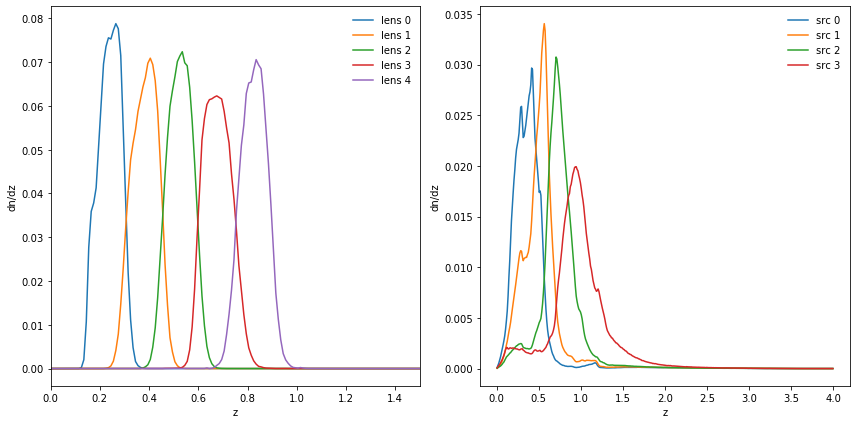

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax = axs[0]
for i in range(n_lens):
    tr = fc_data.get_tracer('lens%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='lens %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)
ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(n_src):
    tr = fc_data.get_tracer('src%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

# Compare Firecrown to the DES Data for Cosmic Shear

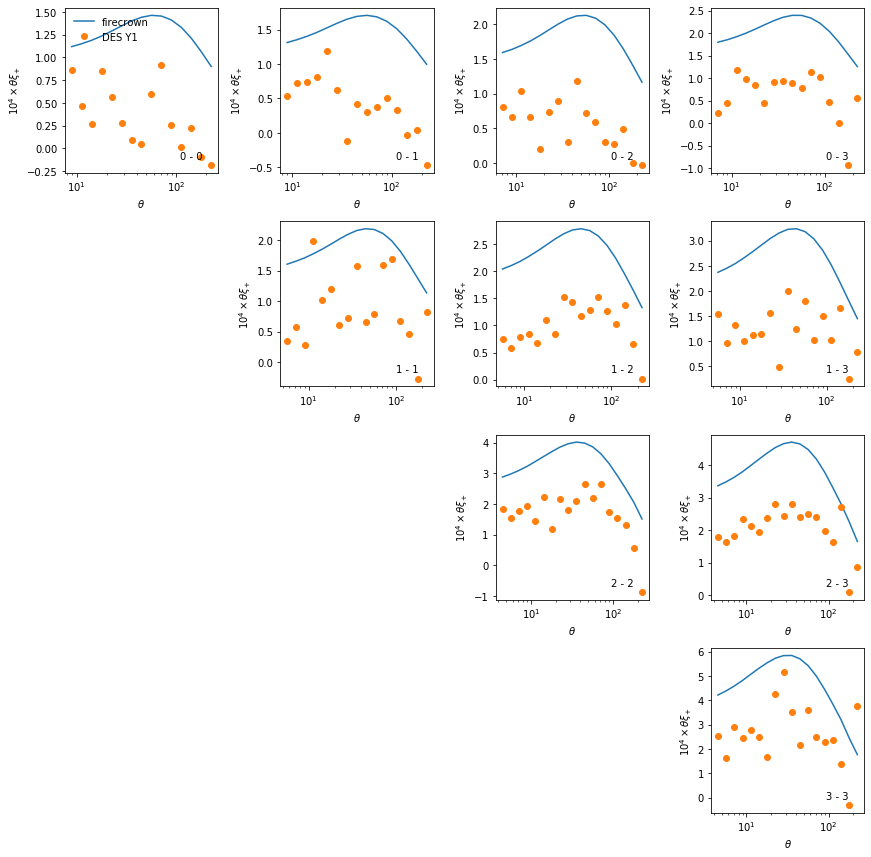

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xip = fc_data.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xip, 
            label='firecrown')
        
        # des
        theta, xip = des_data.get_theta_xi(
             'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)        
        ax.semilogx(
            theta, 
            fac * xip, 
            'o',
            label='DES Y1')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{+}$')
            
plt.tight_layout()

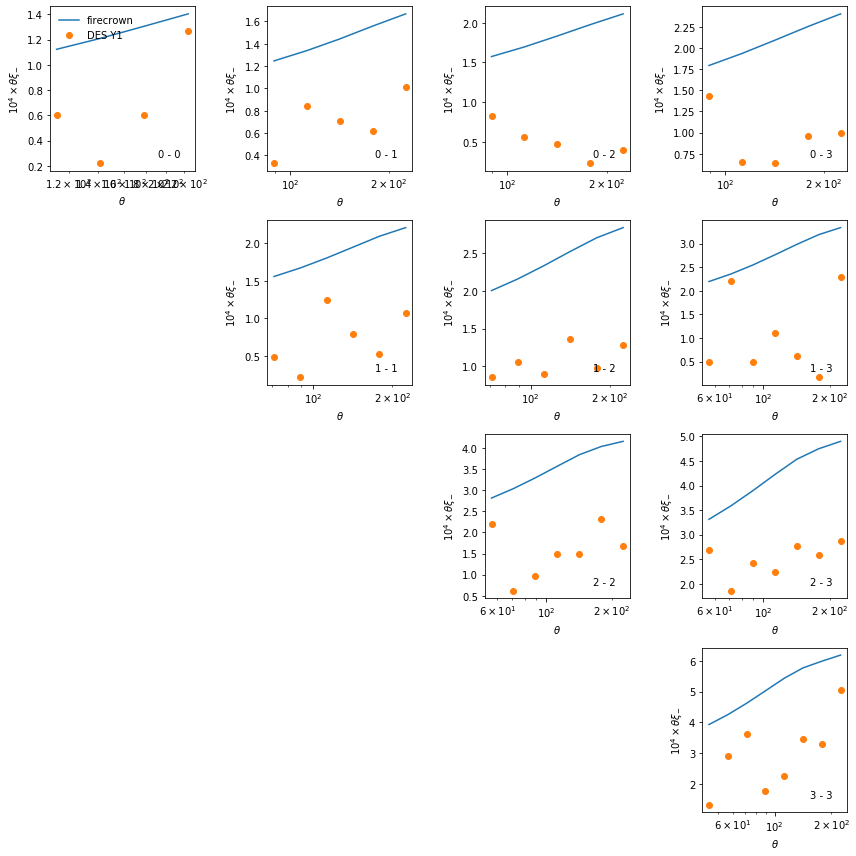

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xim = fc_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j)
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xim, 
            label='firecrown')
        
        # des
        theta, xim = des_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j)        
        ax.semilogx(
            theta, 
            fac * xim, 
            'o',
            label='DES Y1')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{-}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for GG Lensing

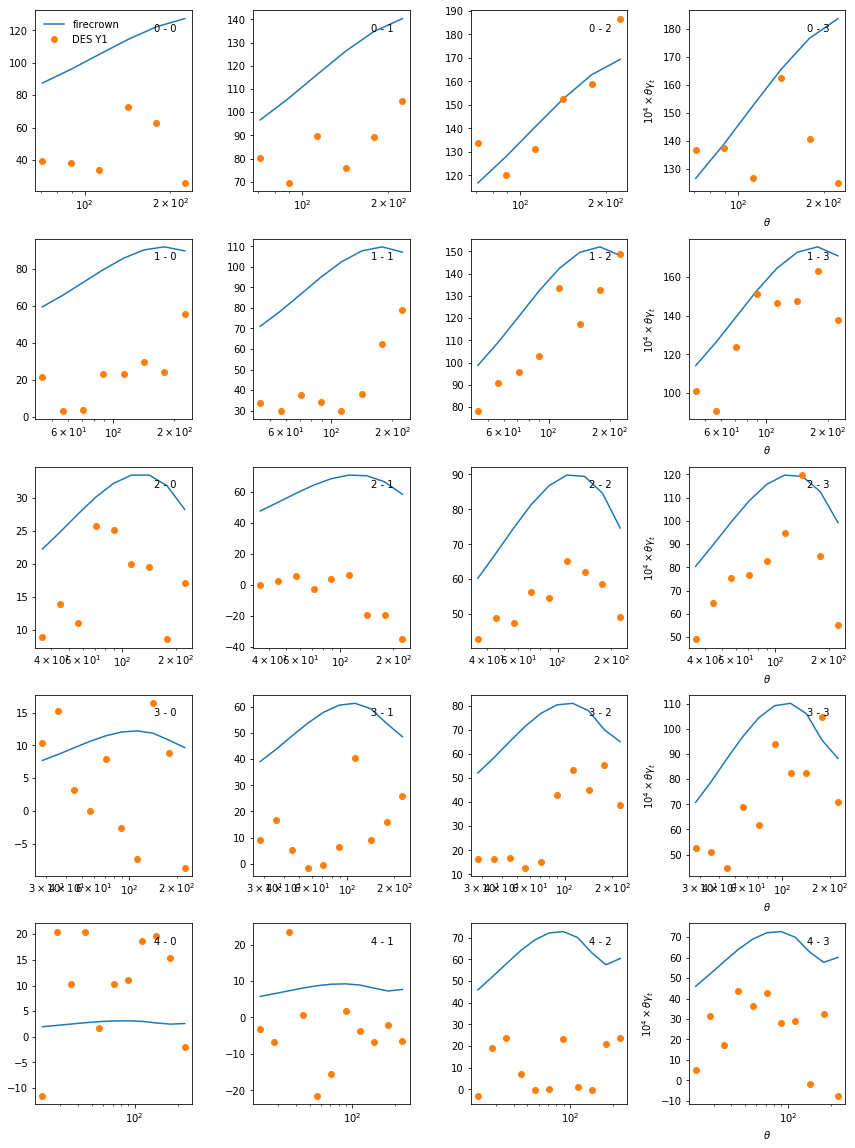

In [8]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 16))

for lensi in range(n_lens):
    for srcj in range(n_src):
        ax = axs[lensi, srcj]

        # read in the firecrown
        theta, xi = fc_data.get_theta_xi(
            'galaxy_shearDensity_xi_t',
            'lens%d' % lensi,
            'src%d' % srcj)
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta, 
            fac * xi,
            label='firecrown')

        theta, xi = des_data.get_theta_xi(
            'galaxy_shearDensity_xi_t',
            'lens%d' % lensi,
            'src%d' % srcj)
        
        ax.semilogx(
            theta, 
            fac * xi,
            'o',
            label='DES Y1')
    
        if lensi == 0 and srcj == 0:
            ax.legend(loc=2, frameon=False)

        ax.text(
            0.9, 0.9, '%d - %d' % (lensi, srcj), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta\gamma_{t}$')
            
plt.tight_layout()

# Compare Firecrown to DES Data for Clustering

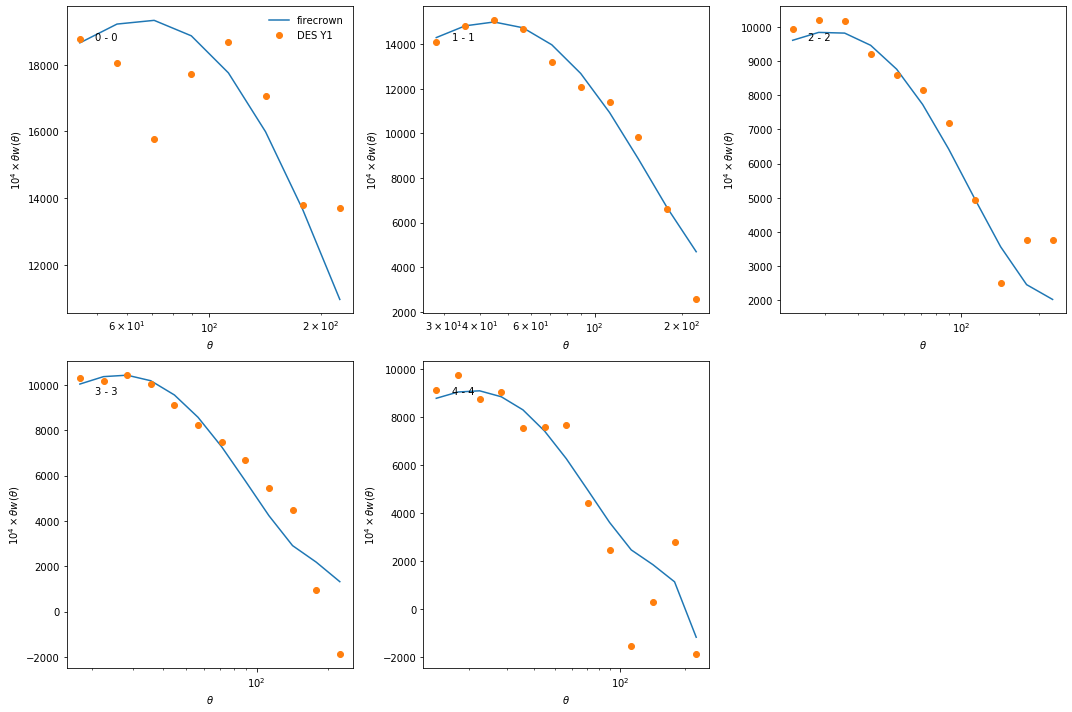

In [9]:
# get loc excluding cosmic shear and gg lensing
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.ravel()
axs[-1].axis('off')
for i in range(n_lens):
    ax = axs[i]

    # read in the firecrown values
    theta, xi = fc_data.get_theta_xi(
        'galaxy_density_xi',
        'lens%d' % i,
        'lens%d' % i)
        
    # this is a factor of 10^4 x theta to take out the dynamic range
    fac = 1e4 * theta
        
    # firecrown
    ax.semilogx(
        theta, 
        (fac * xi),
        label='firecrown')
        
    # des
    theta, xi = des_data.get_theta_xi(
        'galaxy_density_xi',
        'lens%d' % i,
        'lens%d' % i)
    
    ax.semilogx(
        theta, 
        (fac * xi), 
        'o',
        label='DES Y1')
    
    if i == 0:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)

    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta w(\theta)$')
            
plt.tight_layout()

## Plot the Chains

In [10]:
import pandas as pd
import corner

chains = pd.read_csv('output_%s/analysis.csv' % ANALYSIS_ID)
chains['Omega_m'] = chains['Omega_c'] + 0.0485

In [11]:
msk = chains.mcmc_step > 750

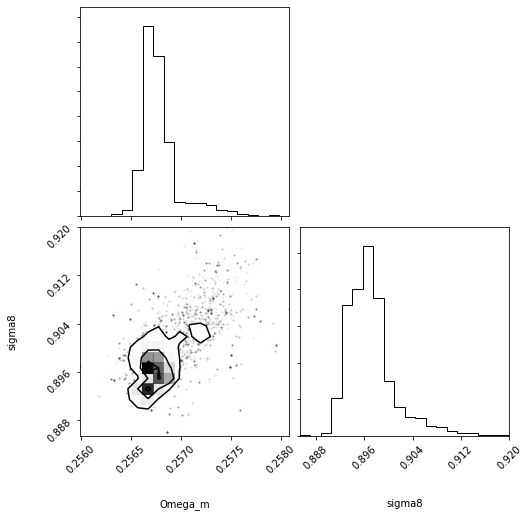

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = corner.corner(
    chains.loc[msk, ['Omega_m', 'sigma8']].to_numpy(),
    labels=['Omega_m', 'sigma8'],
    fig=fig)